In [7]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [39]:
losses = ["6", "12", "18", "24"]
dir = r"plot-utils\doubles"
res = defaultdict(dict)
for i, filename in enumerate(os.listdir(dir)):
    file_path = os.path.join(dir, filename)
    with open(file_path) as f:
        file_input = f.read()
        for loss in losses:
            res[loss][filename.split(".")[0]] = re.findall(rf"{loss}: (\d*\.?\d*)", file_input)



In [40]:
losses = ["6", "12", "18", "24"]
dir = r"plot-utils\floats"
for i, filename in enumerate(os.listdir(dir)):
    file_path = os.path.join(dir, filename)
    with open(file_path) as f:
        file_input = f.read()
        for loss in losses:
            res[loss][filename.split(".")[0]] = re.findall(rf"{loss}: (\d*\.?\d*)", file_input)



dict_keys(['6', '12', '18', '24'])


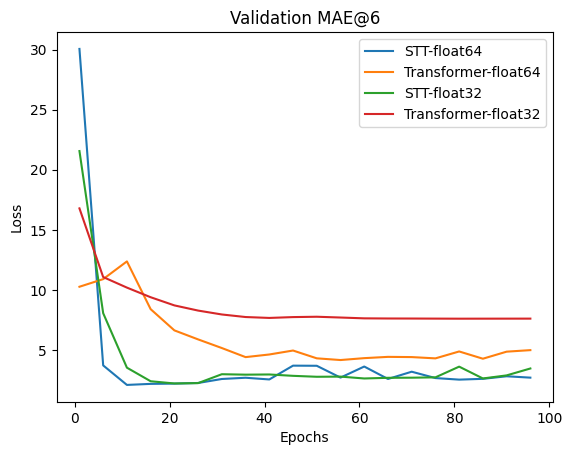

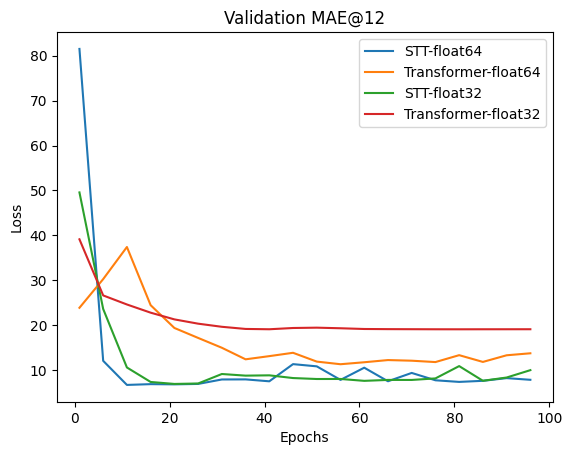

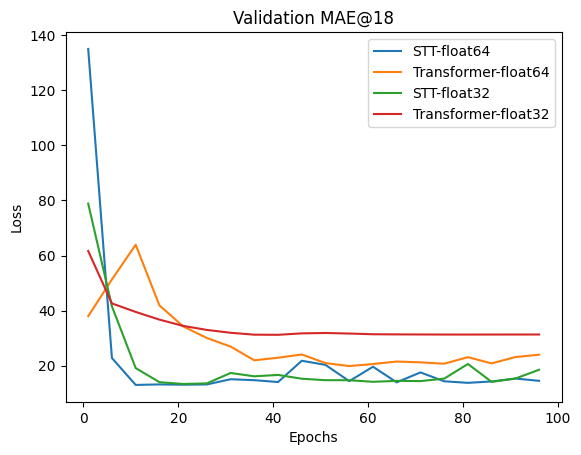

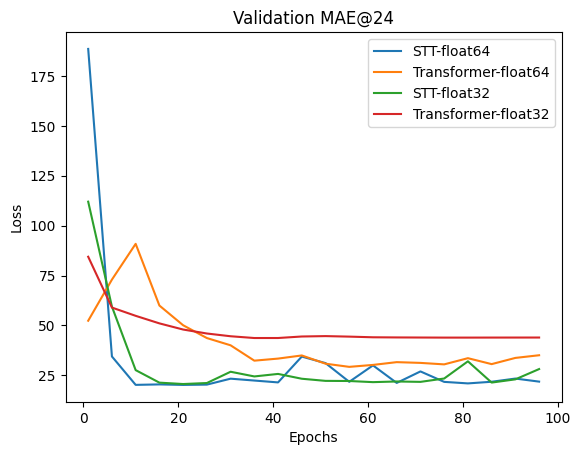

In [42]:
print(res.keys())
for mae, tmp in res.items():
    plt.figure()
    for k,l in tmp.items():
        plt.plot(list(range(1, 97, 5)), [round(float(t),4) for t in l[:20]], label=k)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"Validation MAE@{mae}")
    plt.savefig(f'mae_{mae}.png')